In [2]:
from audio2numpy import open_audio
import numpy as np
import matplotlib.pyplot as plt

In [207]:
signal, signal_rate = open_audio("lisergic.mp3")
print(signal_rate)

44100


In [181]:
orig = signal[:, 0]
L = len(orig)
orig_rms = np.sqrt(np.correlate(orig, orig))
noisies = []
for i in range(3):
  noisy = np.zeros(L)
  rnd = int(np.random.uniform()*signal_rate)
  print(rnd)
  noisy[0 : L-rnd] = orig[rnd : ]
  noisy[L - rnd : ] = orig[ : rnd]
  noisy += 1/orig_rms*np.random.uniform(size=len(orig))
  noisy_rms = np.sqrt(np.correlate(noisy, noisy))
  noisy_norm = noisy/noisy_rms
  noisies.append(noisy_norm)
orig = orig/orig_rms

17107
3590
35072


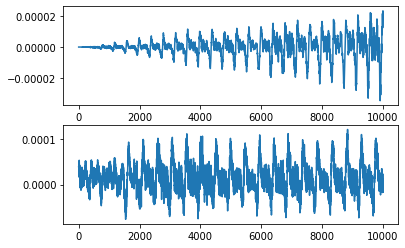

In [138]:
fig, a = plt.subplots(2)
a[0].plot(orig[:10000])
a[1].plot(noisies[0][:10000])
plt.show()

In [183]:
def fase(x, _n):
  L = len(x)
  ret = []
  n = int(_n)%L
  y = np.zeros(L)
  y[ n : ] = x[ : L-n]
  y[ : n] = x[L-n : ]
  return y

In [228]:
def der(rif, test, n):
    L = len(rif)
    A = 2*signal_rate
    B = L - 2*signal_rate  - 1
    f = fase(test, n)
    der = rif[B+1]*f[B+1] + rif[B]*f[B] - rif[A-1]*f[A-1] - rif[A]*f[A]
    return -der

def gradient(rif, test_m, n_v):
    gd = []
    for i in range(len(n_v)):
        d = der(rif, test_m[i], n_v[i])
        gd.append(d/np.linalg.norm(d))
    return np.asarray(gd).reshape(3,)

In [230]:
sr = signal_rate
np.correlate(orig[2*sr : -2*sr], fase(noisies[0], 17107)[2*sr : -2*sr]) - \
np.correlate(orig[2*sr : -2*sr], fase(noisies[0], 17105)[2*sr : -2*sr]) 

array([0.03630455])

In [231]:
der(orig, noisies[0], 17106)

-1.2800587508549886e-09